In [1]:
import logging
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from pipelines import TreeSimilarPipeline
from split_data_type import SplitDataType
from teacher import Teacher

d:\Programming\Python\ML_Final_HousePredict\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logging.basicConfig(level=logging.DEBUG)

In [3]:
submissions_path = Path("../submissions")
submissions_path.mkdir(parents=True, exist_ok=True)


target_column = "SalePrice"

train_df = pd.read_csv("../data/HousePrice_train.csv")
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = pd.read_csv("../data/HousePrice_test.csv")
sample = pd.read_csv("../data/sample_submission.csv")
y_test = sample[target_column]

In [4]:
label_encoder = LabelEncoder()
X_train = TreeSimilarPipeline(X_train, SplitDataType.TRAIN, label_encoder).build()
X_test = TreeSimilarPipeline(X_test, SplitDataType.TEST, label_encoder).build()

DEBUG:root:TRAIN - Function: _drop_not_needed
Size: (1460, 74)
Columns with None: LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

DEBUG:root:TRAIN - Function: _fill_null
Size: (1460, 74)
Columns with None: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageQual, GarageCond, Fence

DEBUG:root:TRAIN - Function: _preprocess_features
Size: (1460, 74)
Columns with None: None

DEBUG:root:TRAIN - Function: _encode
Size: (1460, 74)
Columns with None: None

DEBUG:root:TRAIN - Function: _normalize
Size: (1460, 74)
Columns with None: None

DEBUG:root:TRAIN - Function: _drop_high_correlation
Size: (1460, 63)
Columns with None: None

DEBUG:root:TEST - Function: _drop_not_needed
Size: (1459, 74)
Columns with None: MSZoning, LotFrontage, Alley, Exterior1st, Exterior2nd, MasVnr

# DecisionTreeRegressor

## Усі ознаки kaggle = 0.21833

In [5]:
tree = DecisionTreeRegressor(random_state=0, 
                             max_depth=12,
                             max_features=0.3,
                             min_samples_leaf=3,
                             min_samples_split=7)
tree_teacher = Teacher(tree, X_train, y_train)
print(tree_teacher.fit())
train_pred = tree_teacher.predict(X_train, y_train)
test_pred = tree_teacher.predict(X_test, y_test)

sample[target_column] = test_pred
sample.to_csv(submissions_path / "tree_submission.csv", index=False)

DEBUG:root:Valid score RMSE: 43482.203807108184
DEBUG:root:Valid score RMSLE: 0.21418409332371185
DEBUG:root:RMSE:22131.221725261174
DEBUG:root:RMSLE:0.10496829961970307
DEBUG:root:RMSE:76807.4519003362
DEBUG:root:RMSLE:0.39773116231481376


0.9308979999886098


In [6]:
# params = {'max_depth': np.arange(2, 15, 1),
#           'max_features': np.arange(0.1, 1, 0.1),
#           'min_samples_split': np.arange(2, 12, 1),
#           'min_samples_leaf': np.arange(2, 12, 1),
#           }

# tree_teacher.search_params(params, 'neg_root_mean_squared_error')

In [7]:
#tree_teacher.show_shap(X_test)

## Без неінформативних ознак kaggle = 0.20093

In [8]:
tree = DecisionTreeRegressor(random_state=0, 
                             max_depth=8,
                             max_features=0.7,
                             min_samples_leaf=4,
                             min_samples_split=2)
uninformed_features = ['LotConfig', 'WithMasonry', 'KitchenQual', '3SsnPorch',
       'WithAlley', 'Is_typical_functional', 'Is_standard_electrical',
       'Is_finished_bsmt_fintype2', 'WithFeature', 'Is_normal_sale_condition',
       'Is_Gtl_landslope', 'MiscVal', 'PoolArea', 'KitchenAbvGr', 'ExterQual',
       'ExterCond']
tree_teacher = Teacher(tree, X_train, y_train, uniformed_features=uninformed_features)
print(tree_teacher.fit())
train_pred = tree_teacher.predict(X_train, y_train)
test_pred = tree_teacher.predict(X_test, y_test)

sample[target_column] = test_pred
sample.to_csv(submissions_path / "tree_shap_submission.csv", index=False)

DEBUG:root:Valid score RMSE: 41671.404425021516
DEBUG:root:Valid score RMSLE: 0.20041423835073227
DEBUG:root:RMSE:23111.64648349596
DEBUG:root:RMSLE:0.11694445428161786
DEBUG:root:RMSE:76825.27493756286
DEBUG:root:RMSLE:0.39190590091605093


0.9142303661192547


In [9]:
# params = {'max_depth': np.arange(2, 15, 1),
#           'max_features': np.arange(0.1, 1, 0.1),
#           'min_samples_split': np.arange(2, 12, 1),
#           'min_samples_leaf': np.arange(2, 12, 1),
#           }

# tree_teacher.search_params(params, 'neg_root_mean_squared_error')

# RandomForest

## Усі ознаки kaggle = 0.14982

In [ ]:
forest = RandomForestRegressor(random_state=0,
                                max_depth=11,
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=750
                               )
forest_teacher = Teacher(forest, X_train, y_train)
print(forest_teacher.fit())
train_pred = forest_teacher.predict(X_train, y_train)
test_pred = forest_teacher.predict(X_test, y_test)

sample[target_column] = test_pred
sample.to_csv(submissions_path / "forest_submission.csv", index=False)

In [12]:
# params = {'max_depth': np.arange(8, 12, 1),
#           'n_estimators': np.arange(500, 800, 50),
#           'min_samples_split': np.arange(2, 4, 1),
#           'min_samples_leaf': np.arange(2, 4, 1),
#           }

# forest_teacher.search_params(params, 'neg_root_mean_squared_error')

In [ ]:
forest_teacher.show_shap(X_test)

 14%|===                 | 200/1459 [00:48<05:02]       

# XGBoost

## Усі ознаки kaggle = 0.13570

In [ ]:
xgboost = XGBRegressor(random_state=0, 
                       max_depth=2, 
                       learning_rate=0.1, 
                       n_estimators=875, 
                       colsample_bytree=0.5,
                       subsample=0.5)
xgboost_teacher = Teacher(xgboost, X_train, y_train)
print(xgboost_teacher.fit())
train_pred = xgboost_teacher.predict(X_train, y_train)
test_pred = xgboost_teacher.predict(X_test, y_test)

sample[target_column] = test_pred
sample.to_csv(submissions_path / "xgboost_submission.csv", index=False)

DEBUG:root:Valid score RMSE: 26581.555947296827
DEBUG:root:Valid score RMSLE: 0.12806313215685663
DEBUG:root:RMSE:12398.947052068575
DEBUG:root:RMSLE:0.06713705581107225
DEBUG:root:RMSE:73148.61026219129
DEBUG:root:RMSLE:0.3936168348624494


0.9717317639316309


In [ ]:
# params = {'max_depth': np.arange(2, 6, 1),
#           'learning_rate': np.arange(0.1, 0.5, 0.1),
#           'n_estimators': np.arange(700, 900, 25),
#           'subsample': np.arange(0.5, 0.6, 0.25),
#           'colsample_bytree': np.arange(0.5, 0.6, 0.25),
#           }

# xgboost_teacher.search_params(params, 'neg_root_mean_squared_error')

In [ ]:
#xgboost_teacher.show_shap(X_test)

## Без неінформативних ознак kaggle = 0.13299

In [ ]:
xgboost = XGBRegressor(random_state=0, 
                       max_depth=4, 
                       learning_rate=0.1, 
                       n_estimators=575, 
                       colsample_bytree=0.5,
                       subsample=0.5)
uninformed_features = ['Is_reg_lotshape', 'BsmtHalfBath', 'Is_level_landContour',
       'Is_gable_roofstyle', 'BldgType']
xgboost_teacher = Teacher(xgboost, X_train, y_train, uniformed_features=uninformed_features)
print(xgboost_teacher.fit())
train_pred = xgboost_teacher.predict(X_train, y_train)
test_pred = xgboost_teacher.predict(X_test, y_test)

sample[target_column] = test_pred
sample.to_csv(submissions_path / "xgboost_shap_submission.csv", index=False)

DEBUG:root:Valid score RMSE: 26324.13244277976
DEBUG:root:Valid score RMSLE: 0.1275597842205642
DEBUG:root:RMSE:4411.38345646805
DEBUG:root:RMSLE:0.02409169755272712
DEBUG:root:RMSE:73444.18589040771
DEBUG:root:RMSLE:0.3904215902065995


0.9963599384177244


In [ ]:
# params = {'max_depth': np.arange(2, 6, 1),
#           'learning_rate': np.arange(0.1, 0.2, 0.1),
#           'n_estimators': np.arange(400, 1000, 25),
#           'subsample': np.arange(0.5, 0.6, 0.25),
#           'colsample_bytree': np.arange(0.5, 0.6, 0.25),
#           }

# xgboost_teacher.search_params(params, 'neg_root_mean_squared_error')

## dart booster kaggle - 

In [ ]:
xgboost = XGBRegressor(random_state=0, 
                       booster='dart',
                       max_depth=5,
                       n_estimators=400,
                       )
uninformed_features = ['SaleType', 'Is_finished_bsmt_fintype1']
xgboost_teacher = Teacher(xgboost, X_train, y_train, uniformed_features=uninformed_features)
print(xgboost_teacher.fit())
train_pred = xgboost_teacher.predict(X_train, y_train)
test_pred = xgboost_teacher.predict(X_test, y_test)

sample[target_column] = test_pred
sample.to_csv(submissions_path / "xgboost_dart_submission.csv", index=False)

DEBUG:root:Valid score RMSE: 30991.0314128299
DEBUG:root:Valid score RMSLE: 0.1445986907668821
DEBUG:root:RMSE:272.4758876946729
DEBUG:root:RMSLE:0.0016034773074630614
DEBUG:root:RMSE:72874.92204453058
DEBUG:root:RMSLE:0.3851016160314952


0.9999838750572301


In [ ]:
params = {'booster': ['dart'],
          'max_depth': np.arange(4, 14, 2),
          'n_estimators': np.arange(400, 1200, 200),
          }

xgboost_teacher.search_params(params, 'neg_root_mean_squared_error')

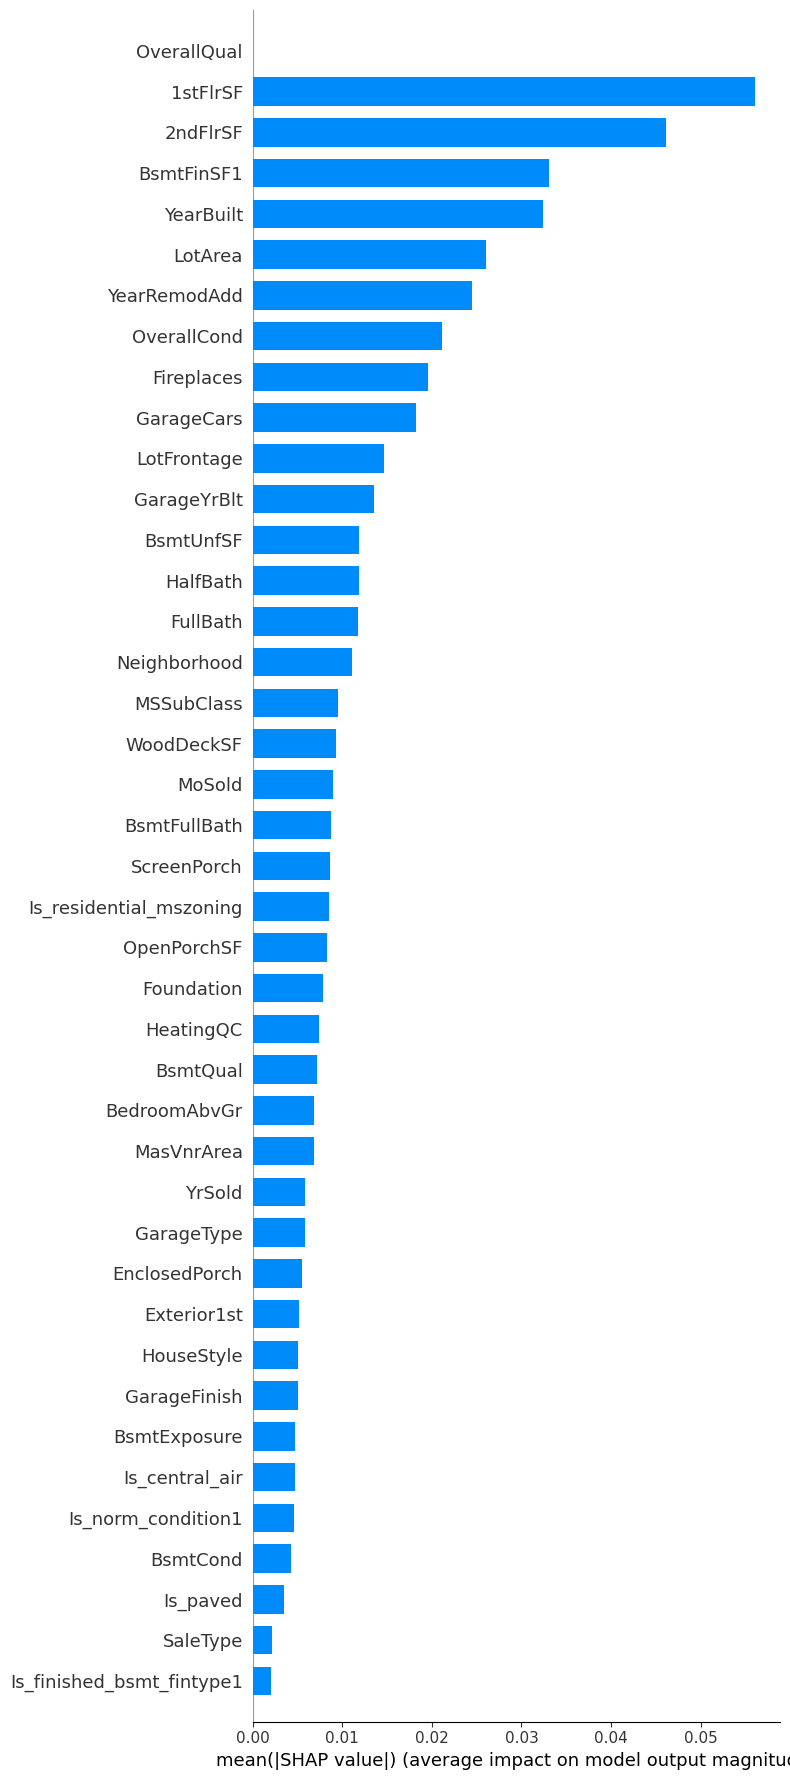

DEBUG:root:Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'YearBuilt',
       'LotArea', 'YearRemodAdd', 'OverallCond', 'Fireplaces', 'GarageCars',
       'LotFrontage', 'GarageYrBlt', 'BsmtUnfSF', 'HalfBath', 'FullBath',
       'Neighborhood', 'MSSubClass', 'WoodDeckSF', 'MoSold', 'BsmtFullBath',
       'ScreenPorch', 'Is_residential_mszoning', 'OpenPorchSF', 'Foundation',
       'HeatingQC', 'BsmtQual', 'BedroomAbvGr', 'MasVnrArea', 'YrSold',
       'GarageType', 'EnclosedPorch', 'Exterior1st', 'HouseStyle',
       'GarageFinish', 'BsmtExposure', 'Is_central_air', 'Is_norm_condition1',
       'BsmtCond', 'Is_paved', 'SaleType', 'Is_finished_bsmt_fintype1'],
      dtype='object')


In [ ]:
xgboost_teacher.show_shap(X_test)

# LGBM

## Усі ознаки kaggle = 0.13536

In [ ]:
lgbmboost = LGBMRegressor(random_state=0,
                          learning_rate=0.1,
                          max_depth=3,
                          n_estimators=550,
                          min_data_in_leaf = 20,
                          force_col_wise=True
                       )
lgbmboost_teacher = Teacher(lgbmboost, X_train, y_train)
print(lgbmboost_teacher.fit())
train_pred = lgbmboost_teacher.predict(X_train, y_train)
test_pred = lgbmboost_teacher.predict(X_test, y_test)

sample[target_column] = test_pred
sample.to_csv(submissions_path / "lgbmboost_submission.csv", index=False)

DEBUG:root:RMSE:10237.660322750027
DEBUG:root:RMSLE:0.05783964179767905


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Total Bins 2367
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 42
[LightGBM] [Info] Start training from score 12.024057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

DEBUG:root:Valid score RMSLE:0.08160014990875496
DEBUG:root:RMSE:72194.71289726468
DEBUG:root:RMSLE:0.3881348231984615


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

DEBUG:root:Valid score RMSLE:0.06133727540436064


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# params = {'max_depth': np.arange(2, 8, 1),
#           'learning_rate': np.arange(0.1, 0.6, 0.5),
#           'n_estimators': np.arange(400, 700, 25),
#           'min_data_in_leaf': np.arange(20, 21, 20),
#           }

# lgbmboost_teacher.search_params(params, 'neg_root_mean_squared_error')

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Total Bins 2367
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 42
[LightGBM] [Info] Start training from score 180921.195890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

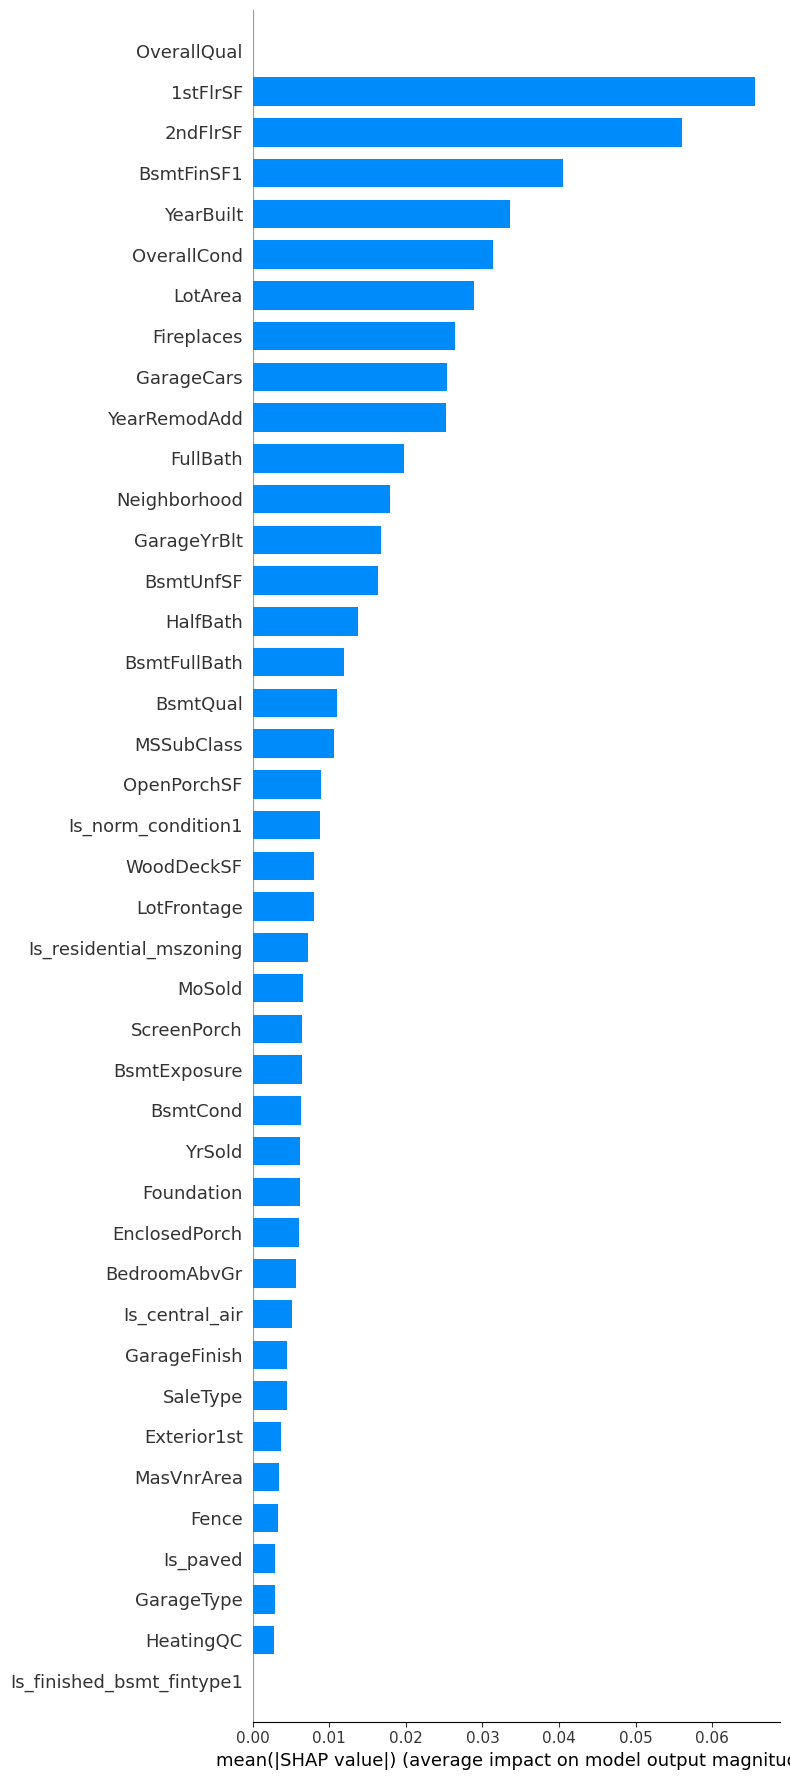

DEBUG:root:Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'YearBuilt',
       'OverallCond', 'LotArea', 'Fireplaces', 'GarageCars', 'YearRemodAdd',
       'FullBath', 'Neighborhood', 'GarageYrBlt', 'BsmtUnfSF', 'HalfBath',
       'BsmtFullBath', 'BsmtQual', 'MSSubClass', 'OpenPorchSF',
       'Is_norm_condition1', 'WoodDeckSF', 'LotFrontage',
       'Is_residential_mszoning', 'MoSold', 'ScreenPorch', 'BsmtExposure',
       'BsmtCond', 'YrSold', 'Foundation', 'EnclosedPorch', 'BedroomAbvGr',
       'Is_central_air', 'GarageFinish', 'SaleType', 'Exterior1st',
       'MasVnrArea', 'Fence', 'Is_paved', 'GarageType', 'HeatingQC',
       'Is_finished_bsmt_fintype1'],
      dtype='object')


In [ ]:
lgbmboost_teacher.show_shap(X_test)